In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# train test split from sklearn
from sklearn.model_selection import train_test_split

#importing my acquire script
import acquire
import prepare
import explore

# Viz imports
import matplotlib.pyplot as plt

In [2]:
# reading in telco churn data using function in acquire module
telco_df = acquire.get_telco_data()


In [3]:
# # describes the df, object and numeric cols
# acquire.get_data_summary(telco_df)

# # shows distribution of individual variables
# acquire.get_viz(telco_df)

### Acquire Takeaways:
- Churn is our target variable
- payment_type_id == payment type. We will keep the payment type id column since that is numeric
- We will encode payment type to show the different payment types as numeric
- internet_service type id column is the same as internet service type column. We will keep the internet service type id column since that is numeric
- contract type id column is the same as contract type column. We will keep the contract type id column since that is numeric  and encode the contract type column to check for each contract category
- binary categorical columns like gender, partner, dependents will have to be encoded to be numeric
- total charges column has an object dtype - will have to change to float
- we will drop the customer id column 
- Some customers had no total charges -  this was where the tenure was 0 so must be new customers

# Prepare

In [3]:
telco_df = prepare.prep_telco_data(telco_df)
telco_df.head()

There are no duplicate rows in your dataset.
Removing the following columns: ['customer_id']


,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
0,2,1,3,0,65,90.45,5957.90,0,1,1,...,1,1,0,0,1,0,0,0,0,1
1,4,1,3,0,54,45.20,2460.55,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,0,56,45.05,2560.10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,3,0,20,39.40,825.40,1,1,1,...,0,1,0,0,1,0,0,1,0,0
4,3,1,3,0,72,85.15,6316.20,1,1,0,...,1,1,0,0,1,0,0,0,0,0


In [5]:
telco_df.churn_Yes.shape

(7043,)

In [4]:
train, validate, test = prepare.train_validate_test_split(telco_df, 'churn_Yes')

### Prepare Takeaways:

- There are no duplicates in the dataset
- I dropped the customer id column 
- I changed the total charges which were empty to null values and then replaced them with the same value as the monthly charges for new customers.
- Then I changed total charges to a float
- Encoded categorical variables
- Split the data set into train, validate and test

# Explore

In [7]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
5642,4,3,3,0,23,25.60,514.75,0,1,1,...,0,1,0,0,1,0,1,1,0,0
3338,3,2,2,0,27,100.50,2673.45,1,0,0,...,1,1,0,1,0,1,0,0,0,0
4273,1,2,1,1,7,89.15,574.35,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2382,3,1,1,0,47,58.60,2723.40,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2655,4,2,3,0,41,99.65,4220.35,1,0,0,...,1,1,0,0,1,1,0,1,0,0


In [8]:
cat_vars = ['gender_Male', 'senior_citizen']
quant_vars = ['monthly_charges']

Frequency table of gender_Male
   gender_Male  Count  Percent
1            0   2013    51.05
0            1   1930    48.95


Frequency table of senior_citizen
   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23


Bar Plot of gender_Male


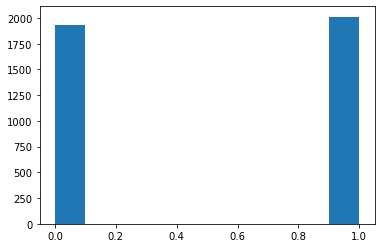

Bar Plot of senior_citizen


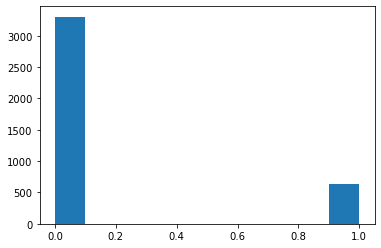

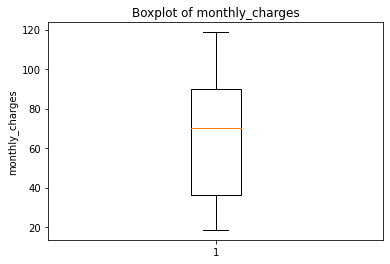

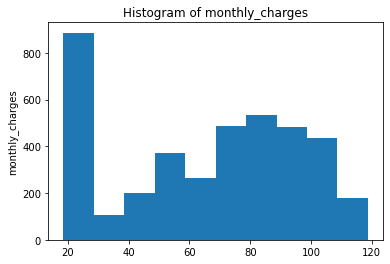

Summary Statistics of monthly_charges
count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64




In [9]:
explore.explore_univariate(train, cat_vars, quant_vars)

   gender_Male  count  percent
1            0   2013    51.05
0            1   1930    48.95
-------------------------------


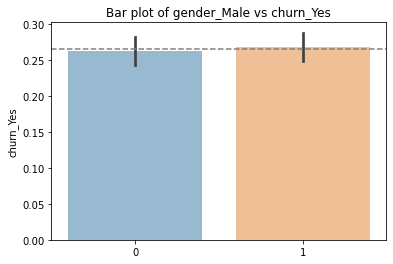

   senior_citizen  count  percent
0               0   3303    83.77
1               1    640    16.23
-------------------------------


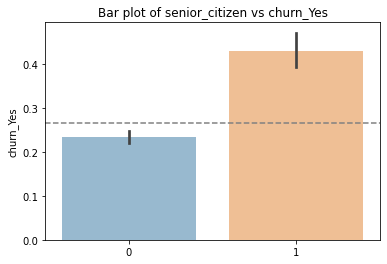

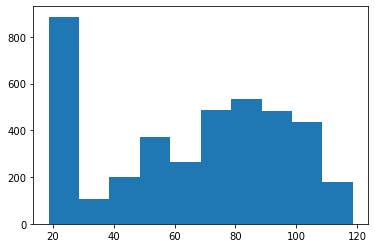

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


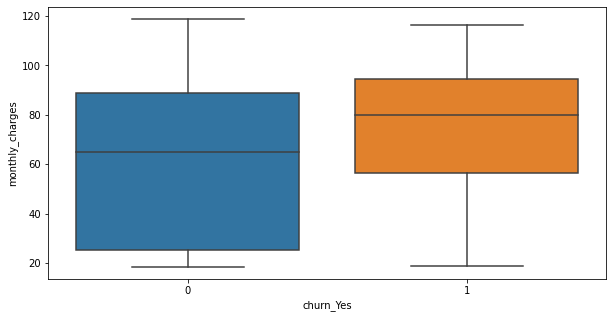

In [5]:
cat_vars = ['gender_Male', 'senior_citizen']
quant_vars = ['monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [11]:
train.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'has_partner', 'has_dependents', 'has_phone_service',
       'has_single_line', 'has_multiple_lines',
       'online_security_No internet service', 'has_online_security',
       'online_backup_No internet service', 'has_online_backup',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'has_1yr_contract',
       'has_2yr_contract', 'has_fiber', 'has_internet_service', 'pay_by_card',
       'pay_echeck', 'pay_mailcheck'],
      dtype='object')

In [12]:
telco_df.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

   contract_type_id  count  percent
1                 3   2162    54.83
3                 2    974    24.70
2                 1    807    20.47
-------------------------------


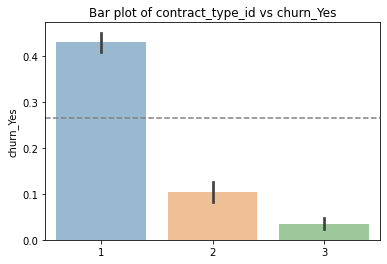

   has_1yr_contract  count  percent
0                 0   3136    79.53
1                 1    807    20.47
-------------------------------


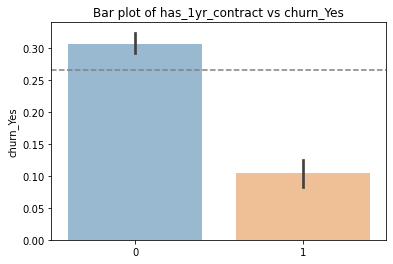

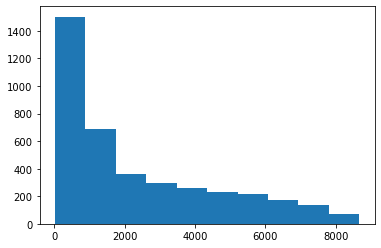

count    3943.000000
mean     2310.686787
std      2275.714986
min        18.800000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


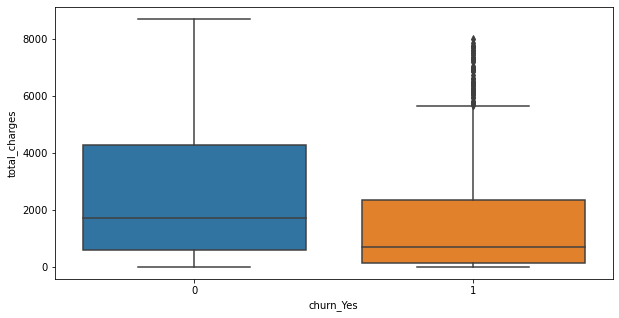

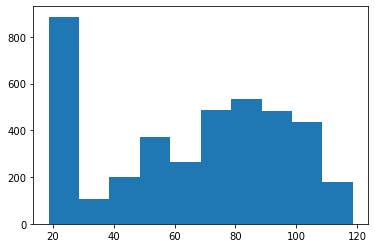

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


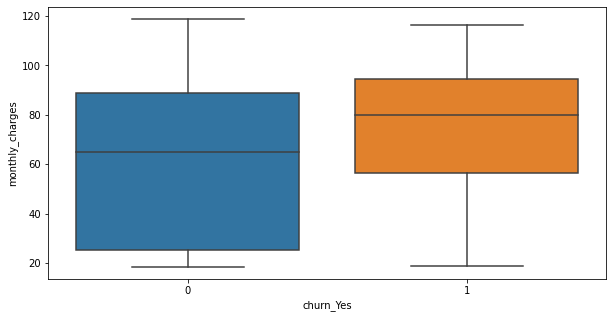

In [6]:
cat_vars = ['contract_type_id', 'has_1yr_contract']
quant_vars = ['total_charges', 'monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

   pay_by_card  count  percent
0            1   3091    78.39
1            0    852    21.61
-------------------------------


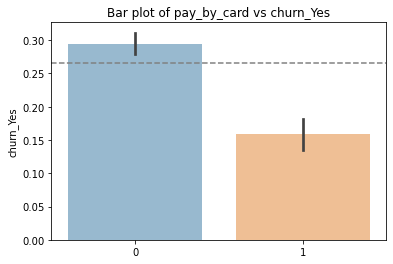

   pay_echeck  count  percent
0           0   2623    66.52
1           1   1320    33.48
-------------------------------


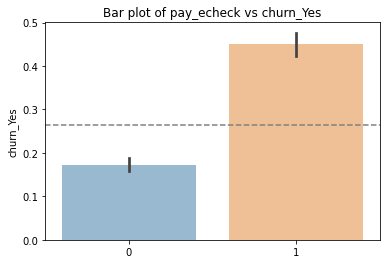

   pay_mailcheck  count  percent
0              0   3051    77.38
1              1    892    22.62
-------------------------------


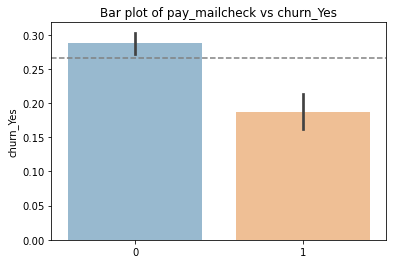

   payment_type_id  count  percent
1                4   1320    33.48
2                3    892    22.62
3                1    879    22.29
4                2    852    21.61
-------------------------------


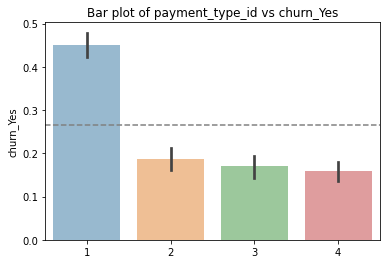

In [14]:
cat_vars = ['pay_by_card', 'pay_echeck', 'pay_mailcheck', 'payment_type_id']
quant_vars = []
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

   has_phone_service  count  percent
1                  1   3550    90.03
0                  0    393     9.97
-------------------------------


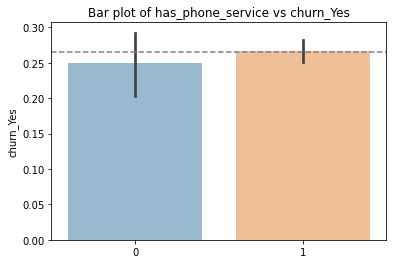

   has_internet_service  count  percent
0                     1   3105    78.75
1                     0    838    21.25
-------------------------------


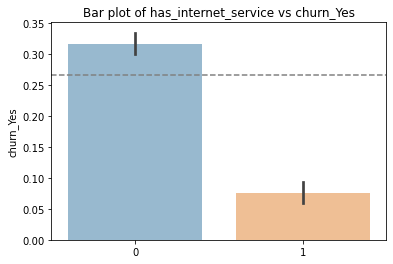

In [15]:
cat_vars = ['has_phone_service', 'has_internet_service']
quant_vars = []
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

   has_2yr_contract  count  percent
0                 1   2969     75.3
1                 0    974     24.7
-------------------------------


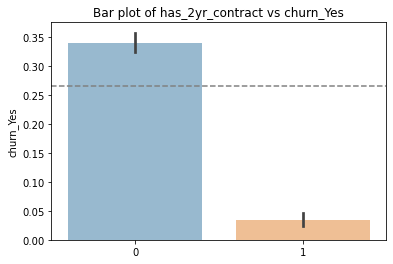

   has_1yr_contract  count  percent
0                 0   3136    79.53
1                 1    807    20.47
-------------------------------


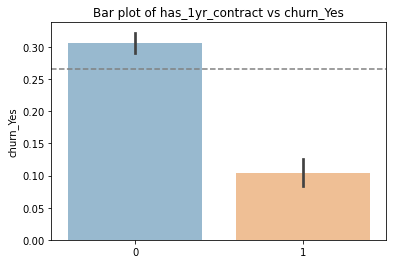

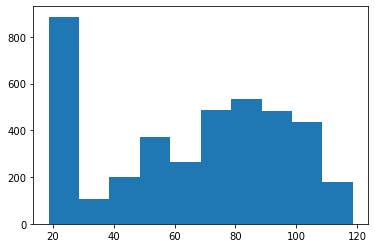

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


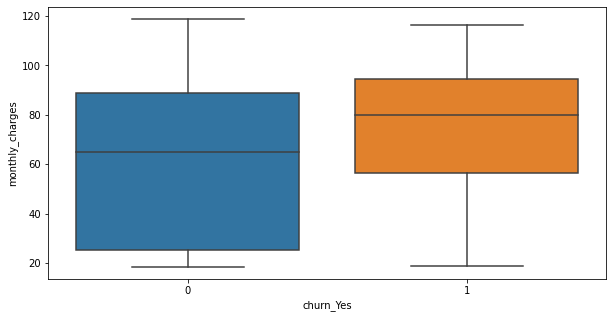

In [7]:
cat_vars = ['has_2yr_contract', 'has_1yr_contract']
quant_vars = ['monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

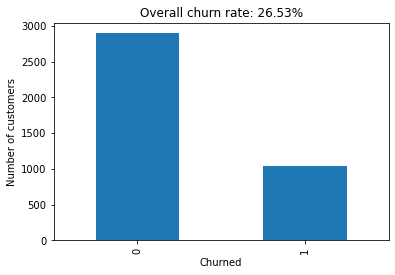

In [17]:
train.churn_Yes.value_counts().sort_index().plot.bar()
churn_rate = train.churn_Yes.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('Churned')
plt.ylabel('Number of customers')
plt.show()


Hypothesis:
    
h_null = churn rate is not dependent on internet service

h_alt = churn rate is dependent on internet service

In [18]:
alpha = 0.05

In [19]:
ct = pd.crosstab(train.has_internet_service, train.churn_Yes)
ct

churn_Yes,0,1
has_internet_service,,
0,2122,983
1,775,63


In [20]:
chi2_stat, p, degf, expected_internet = stats.chi2_contingency(ct)
print(expected_internet)
print(f"p-val: {p}")

[[2281.30484403  823.69515597]
 [ 615.69515597  222.30484403]]
p-val: 1.5011234581308948e-44


In [21]:
if p < alpha:
    print("We reject the null hypothesis. We have evidence to believe that churn rate is dependent on internet service.")
else:
    print("We fail to reject the null hypothesis. We have evidence to believe that churn rate is not dependent on internet service.")


We reject the null hypothesis. We have evidence to believe that churn rate is dependent on internet service.


Hypothesis:
h_null = no correlation between total charges and contract type 

h_alt = There is a correlation between total charges and contract type

In [22]:
n = train.shape[0]     # number of observations in the train dataset
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

In [23]:
corr, p = stats.pearsonr(train.total_charges, train.contract_type_id)
corr, p

(0.44386253497625483, 4.825341596538749e-190)

In [24]:
if p < alpha:
    print("We reject the null hypothesis. There is a correlation between monthly charges and contract type.")
else:
    print("We fail to reject the null hypothesis. There is no correlation between monthly charges and contract type.")

We reject the null hypothesis. There is a correlation between monthly charges and contract type.


In [25]:
train.corr()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
payment_type_id,1.000000,-0.001259,0.362086,-0.085626,0.344644,-0.061474,0.234961,-0.001234,0.127140,0.131826,...,0.003719,-0.101617,-0.255583,0.127239,0.292841,-0.173127,0.103935,0.767729,-0.815408,-0.150781
internet_service_type_id,-0.001259,1.000000,0.087600,-0.028488,-0.042404,-0.312810,-0.174082,0.000032,0.009531,0.048644,...,-0.242978,-0.139070,-0.043897,-0.006104,0.088101,0.161515,0.800819,-0.033622,-0.070574,0.129588
contract_type_id,0.362086,0.087600,1.000000,-0.162383,0.660485,-0.073387,0.443863,0.000909,0.284303,0.250273,...,0.094113,-0.191500,-0.396156,0.182088,0.887957,-0.254200,0.233006,0.211945,-0.350409,0.004877
senior_citizen,-0.085626,-0.028488,-0.162383,1.000000,0.007666,0.230111,0.098199,0.007243,0.021704,-0.201859,...,0.130568,0.170268,0.165482,-0.051119,-0.134109,0.273674,-0.191692,-0.012184,0.173069,-0.167323
tenure,0.344644,-0.042404,0.660485,0.007666,1.000000,0.250854,0.828458,0.004282,0.366470,0.160178,...,0.272839,-0.006974,-0.352282,0.198606,0.549839,0.023973,-0.052663,0.241171,-0.215684,-0.222408
monthly_charges,-0.061474,-0.312810,-0.073387,0.230111,0.250854,1.000000,0.651026,-0.012991,0.096066,-0.117644,...,0.628885,0.344421,0.189040,-0.027663,-0.058476,0.787673,-0.759184,0.043349,0.261135,-0.377666
total_charges,0.234961,-0.174082,0.443863,0.098199,0.828458,0.651026,1.000000,-0.000388,0.306703,0.065769,...,0.506926,0.146639,-0.202005,0.150543,0.361519,0.366048,-0.378617,0.196721,-0.073782,-0.285115
gender_Male,-0.001234,0.000032,0.000909,0.007243,0.004282,-0.012991,-0.000388,1.000000,-0.014710,-0.007656,...,0.001707,-0.012850,0.006885,0.012583,-0.005001,-0.006451,0.003944,0.003738,-0.003110,0.014081
has_partner,0.127140,0.009531,0.284303,0.021704,0.366470,0.096066,0.306703,-0.014710,1.000000,0.463617,...,0.107582,-0.028135,-0.137696,0.070877,0.243511,0.005104,0.005469,0.084683,-0.078225,-0.089288
has_dependents,0.131826,0.048644,0.250273,-0.201859,0.160178,-0.117644,0.065769,-0.007656,0.463617,1.000000,...,-0.061967,-0.114746,-0.160315,0.062744,0.214199,-0.167655,0.145469,0.056857,-0.163981,0.063927
